In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Drinks

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [3]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [4]:
t = drinks.join('Cafe', discounts, 'Location')
t

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [5]:
t.with_column('Discounted', t.column(2) * (1 - t.column(3)/ 100))

Cafe,Drink,Price,Coupon % off,Discounted
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


In [6]:
two = drinks.join('Cafe', drinks)
two

Cafe,Drink,Price,Drink_2,Price_2
Abe's,Espresso,2,Espresso,2
Nefeli,Espresso,2,Espresso,2
Nefeli,Espresso,2,Latte,3
Nefeli,Latte,3,Espresso,2
Nefeli,Latte,3,Latte,3
Tea One,Milk Tea,4,Milk Tea,4


In [7]:
two.with_column('Total', two.column('Price') + two.column('Price_2'))

Cafe,Drink,Price,Drink_2,Price_2,Total
Abe's,Espresso,2,Espresso,2,4
Nefeli,Espresso,2,Espresso,2,4
Nefeli,Espresso,2,Latte,3,5
Nefeli,Latte,3,Espresso,2,5
Nefeli,Latte,3,Latte,3,6
Tea One,Milk Tea,4,Milk Tea,4,8


## Bikes

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [8]:
trips = Table.read_table('trip.csv').sample(10000)
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
503312,516,10/17/2014 9:06,Harry Bridges Plaza (Ferry Building),50,10/17/2014 9:14,2nd at Townsend,61,623,Subscriber,94579
714674,954,4/7/2015 8:26,Civic Center BART (7th at Market),72,4/7/2015 8:42,Embarcadero at Sansome,60,291,Subscriber,94102
561490,319,12/1/2014 7:29,Beale at Market,56,12/1/2014 7:35,2nd at Townsend,61,67,Subscriber,94523
855871,277,7/21/2015 16:36,Broadway St at Battery St,82,7/21/2015 16:41,Mechanics Plaza (Market at Battery),75,509,Subscriber,94588
577068,857,12/15/2014 22:43,Townsend at 7th,65,12/15/2014 22:57,Grant Avenue at Columbus Avenue,73,440,Subscriber,94133
841604,418,7/10/2015 16:37,Davis at Jackson,42,7/10/2015 16:44,Embarcadero at Sansome,60,336,Subscriber,94111
458109,825,9/17/2014 18:07,San Francisco Caltrain (Townsend at 4th),70,9/17/2014 18:21,Broadway St at Battery St,82,109,Subscriber,94133
825039,281,6/27/2015 16:14,Beale at Market,56,6/27/2015 16:19,Spear at Folsom,49,455,Subscriber,94105
894251,530,8/18/2015 8:16,Temporary Transbay Terminal (Howard at Beale),55,8/18/2015 8:25,Embarcadero at Vallejo,48,332,Subscriber,94611
496182,472,10/13/2014 16:37,2nd at South Park,64,10/13/2014 16:44,Harry Bridges Plaza (Ferry Building),50,86,Subscriber,94949


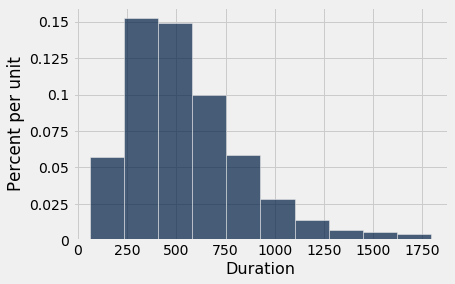

In [9]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration')

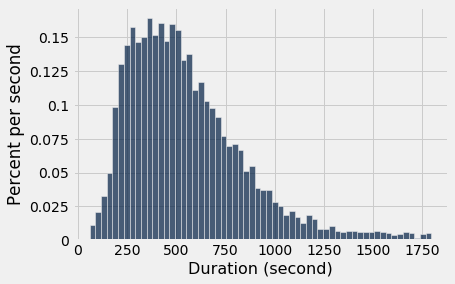

In [10]:
commute.hist('Duration', bins=60, unit='second')

In [11]:
(550-250) * 0.15

45.0

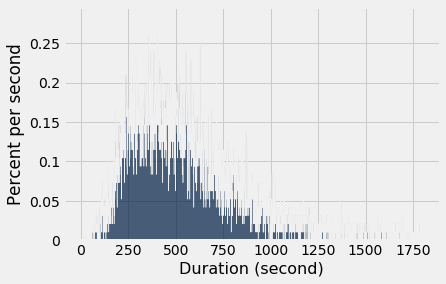

In [12]:
commute.hist('Duration', bins=np.arange(1801), unit='second')

In [13]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),792
San Francisco Caltrain 2 (330 Townsend),614
Harry Bridges Plaza (Ferry Building),451
2nd at Townsend,405
Temporary Transbay Terminal (Howard at Beale),393
Steuart at Market,386
Townsend at 7th,382
Embarcadero at Sansome,352
Market at 10th,329
Market at Sansome,320


In [14]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,0,3,25,2,0,0,3,1,0,0,0,4,1,0,1,2,0,1,0,0,0,0,1,16,2,0,0,4,3,9,2,0,0,0,0,0,0,1,5,1,0,0,0,0,0,0,0,0,0,23,17,1,0,0,0,0,0,0,0,0,0,1,0,0,1,10,11,0,0,2
2nd at South Park,7,6,2,7,0,0,1,1,0,0,2,5,4,0,0,1,6,2,2,0,0,1,3,19,15,0,0,7,5,49,2,0,0,0,0,0,0,7,1,6,0,0,0,0,0,0,0,0,0,16,12,2,0,0,0,0,0,0,0,0,0,4,0,0,10,11,6,0,1,9
2nd at Townsend,11,6,5,3,0,0,19,5,0,0,2,6,6,0,11,9,14,20,5,0,0,1,11,64,10,0,0,1,8,26,3,0,0,0,0,0,0,3,4,4,0,0,0,0,0,0,0,0,0,33,10,0,0,0,0,0,0,0,0,0,2,9,0,0,58,22,9,0,3,5
5th at Howard,5,7,2,1,0,0,0,4,0,0,4,2,4,0,3,2,1,2,2,0,0,3,2,8,13,0,0,10,5,3,1,0,0,0,0,0,0,2,3,5,0,0,0,0,0,0,0,0,0,23,52,1,0,0,0,0,0,0,0,0,2,2,0,0,6,25,6,0,0,14
Adobe on Almaden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,1,6,0,0,0,0,0,0,0,0,0,0
Beale at Market,8,4,10,1,0,0,1,16,0,0,6,0,3,0,7,7,5,22,8,0,0,0,13,1,0,0,0,12,8,3,2,0,0,0,0,0,0,3,4,4,0,0,0,0,0,0,0,0,0,24,10,1,0,0,0,0,0,0,0,0,9,5,0,0,0,8,3,0,2,3
Broadway St at Battery St,2,0,11,3,0,0,22,4,0,0,1,4,11,0,3,2,2,2,0,0,0,0,2,2,1,0,0,2,2,12,6,0,0,0,0,0,0,4,1,5,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,2,2,0,0,12,24,6,0,2,2
California Ave Caltrain Station,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
duration = trips.select(3, 6, 1)
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),2nd at Townsend,516
Civic Center BART (7th at Market),Embarcadero at Sansome,954
Beale at Market,2nd at Townsend,319
Broadway St at Battery St,Mechanics Plaza (Market at Battery),277
Townsend at 7th,Grant Avenue at Columbus Avenue,857
Davis at Jackson,Embarcadero at Sansome,418
San Francisco Caltrain (Townsend at 4th),Broadway St at Battery St,825
Beale at Market,Spear at Folsom,281
Temporary Transbay Terminal (Howard at Beale),Embarcadero at Vallejo,530
2nd at South Park,Harry Bridges Plaza (Ferry Building),472


In [16]:
shortest = duration.group([0, 1], min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,5055
2nd at Folsom,2nd at South Park,99
2nd at Folsom,2nd at Townsend,183
2nd at Folsom,5th at Howard,231
2nd at Folsom,Beale at Market,274
2nd at Folsom,Broadway St at Battery St,454
2nd at Folsom,Civic Center BART (7th at Market),584
2nd at Folsom,Clay at Battery,348
2nd at Folsom,Commercial at Montgomery,351
2nd at Folsom,Embarcadero at Bryant,224


In [17]:
from_cc = shortest.where(0, are.containing('Civic Center BART')).sort(2)
from_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),116
Civic Center BART (7th at Market),Powell Street BART,129
Civic Center BART (7th at Market),Market at 10th,142
Civic Center BART (7th at Market),Market at 4th,188
Civic Center BART (7th at Market),5th at Howard,237
Civic Center BART (7th at Market),South Van Ness at Market,238
Civic Center BART (7th at Market),Market at Sansome,312
Civic Center BART (7th at Market),Powell at Post (Union Square),318
Civic Center BART (7th at Market),Mechanics Plaza (Market at Battery),322
Civic Center BART (7th at Market),Townsend at 7th,342


## Maps

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [18]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [19]:
Marker.map_table(stations.select('lat', 'long', 'name'))

/srv/conda/lib/python3.7/site-packages/datascience/maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


In [20]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=150)

/srv/conda/lib/python3.7/site-packages/datascience/maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)


In [21]:
from_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),116
Civic Center BART (7th at Market),Powell Street BART,129
Civic Center BART (7th at Market),Market at 10th,142
Civic Center BART (7th at Market),Market at 4th,188
Civic Center BART (7th at Market),5th at Howard,237
Civic Center BART (7th at Market),South Van Ness at Market,238
Civic Center BART (7th at Market),Market at Sansome,312
Civic Center BART (7th at Market),Powell at Post (Union Square),318
Civic Center BART (7th at Market),Mechanics Plaza (Market at Battery),322
Civic Center BART (7th at Market),Townsend at 7th,342


In [22]:
colors = stations.group('landmark').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [23]:
colored = stations.join('landmark', colors).select('lat', 'long', 'name', 'color')
Marker.map_table(colored)

In [24]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,228
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,265
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,405
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,186
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,17
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,21
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,221
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,185
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,8
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,35


In [25]:
Circle.map_table(station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
))